In [2]:
import sys

import numpy
import pandas

import matplotlib
import seaborn

import sklearn

print('Python {}'.format(sys.version))
print('numpy {}'.format(numpy.__version__))
print('pandas {}'.format(pandas.__version__))
print('matplotlib {}'.format(matplotlib.__version__))
print('seaborn {}'.format(seaborn.__version__))
print('sklearn {}'.format(sklearn.__version__))

Python 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
numpy 1.14.3
pandas 0.23.0
matplotlib 2.2.2
seaborn 0.8.1
sklearn 0.21.3


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
import os

In [28]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 35)

##### We've 1470 rows and 35 columns for our analysis which is comparitively low thus our model could have low accuracy
##### Before looking at the statistical description of our dataset i want to arrange categorical and numerical features for detailed analysis

In [7]:
# Classifying Categorical and numerical features with threshold of 9
df_cat = pd.DataFrame()
df_qua = pd.DataFrame()
def count_categorical(df):
    for i in df.columns:
        th = 9
        if len(df[i].unique()) > th:
            df_qua[i] = df[i]
        elif len(df[i].unique()) == 1:
            continue
        else:
            df_cat[i] = df[i]
    
count_categorical(df)

In [8]:
df_qua.describe()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


#### OBSERVATION
##### Most of our features are normally distributed except some features like distance from home where mean is greater than mode which implies it there are lots of people living nearby.

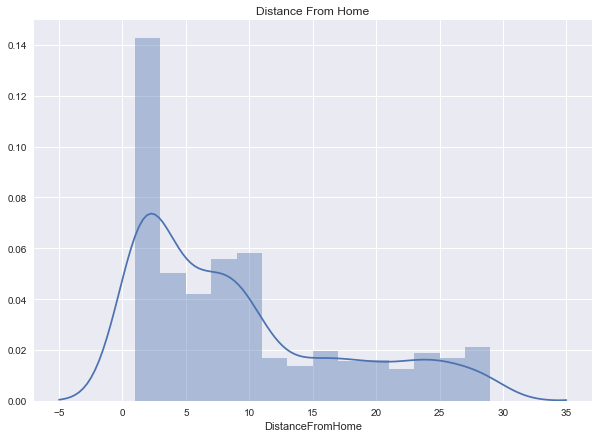

In [9]:
fig = plt.figure(figsize=(10,7))
plt.title('Distance From Home')
sns.distplot(df_qua['DistanceFromHome'], kde=True, norm_hist=True)
plt.show()

##### Let's look at the Attrition rate vs Distance from Home, for that purpose let's bin our values into three labels

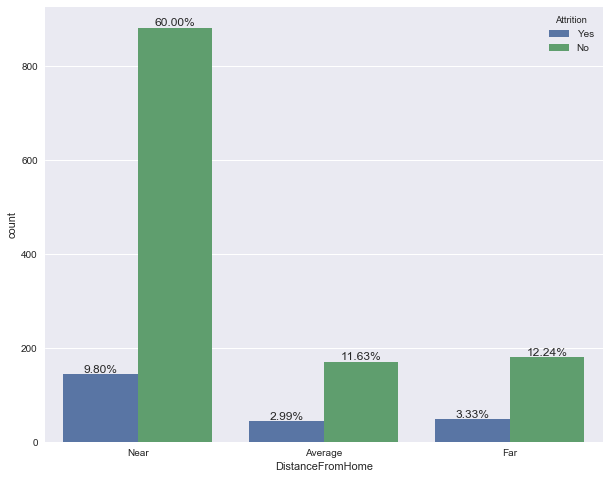

In [10]:
### Let's convert continious to discrete
target = pd.cut(df['DistanceFromHome'], bins=3, labels=['Near', 'Average', 'Far'], right=False)

### PLOT
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
total = float(len(df)) 
ax = sns.countplot(x=target, hue="Attrition", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

##### let's check whether the input features are relevant to the outcome to be predicted or not, for this we use chi2_cintingency test as our staistical testas both our dependent and independent feature is categorical in nature

In [11]:
#Encode target feature
target_map = {'Yes':1, 'No':0}
df['Attrition'] = df["Attrition"].apply(lambda x: target_map[x])

In [12]:
# import necessary libraries
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = np.array([df['Attrition'], df['DistanceFromHome']])
stat, p, dof, expected = chi2_contingency(table)

# p-value approach
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent, Significant (reject H0)')
else:
    print('Independent, Insignificant (fail to reject H0)')

significance=0.050, p=0.000
Dependent, Significant (reject H0)


##### We can conclude that our independent features are Dependent and significant with our target features

##### Monthly Income has also positive skewness implying the only few people has the high monthly income bracket.

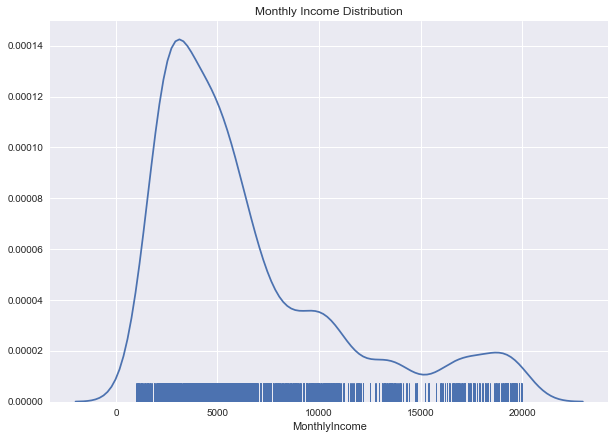

In [13]:
fig = plt.figure(figsize=(10,7))
plt.title('Monthly Income Distribution')
sns.distplot(df_qua['MonthlyIncome'], hist=False, rug=True)
plt.show()

##### Attrition vs MonthlyIncome (convert continious to categorical(ordinal))

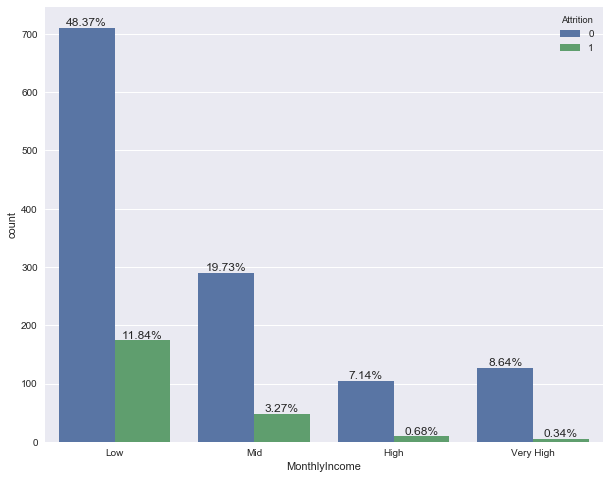

In [14]:
target = pd.cut(df['MonthlyIncome'], bins=4, labels=['Low', 'Mid', 'High', 'Very High'], right=False)
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
total = float(len(df)) 
ax = sns.countplot(x=target, hue="Attrition", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

##### Doing Statistical testing to check the Significance for target and independent feature

In [15]:
### Let's convert continious to discrete
target = pd.cut(df['MonthlyIncome'], bins=4, labels=['Low', 'Mid', 'High', 'Very High'], right=False)
target_value = {'Low':1, 'Mid':2, 'High':3, 'Very High':4}
ind_MI = target.apply(lambda x: target_value[x])
type(ind_MI)

pandas.core.series.Series

In [16]:
# contingency table
table = np.array([df['Attrition'], ind_MI])
stat, p, dof, expected = chi2_contingency(table)

# p-value approach
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent, Significant (reject H0)')
else:
    print('Independent, Insignificant (fail to reject H0)')

significance=0.050, p=1.000
Independent, Insignificant (fail to reject H0)


##### Another thing we can observe is that the 75% of employee has been working for or below 9 years.

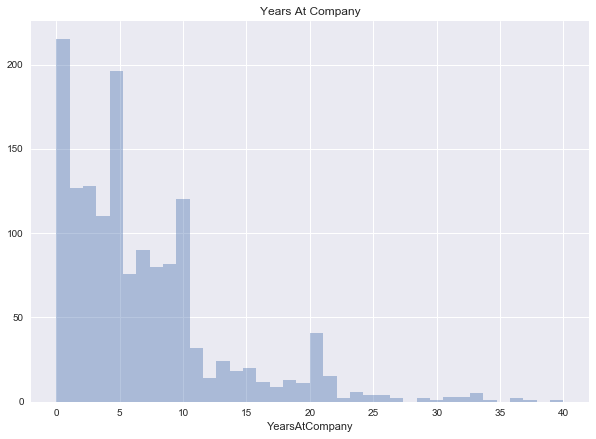

In [17]:
fig = plt.figure(figsize=(10,7))
plt.title('Years At Company')
sns.distplot(df_qua['YearsAtCompany'], kde=False)
plt.show()

##### Attrition vs Years At Company

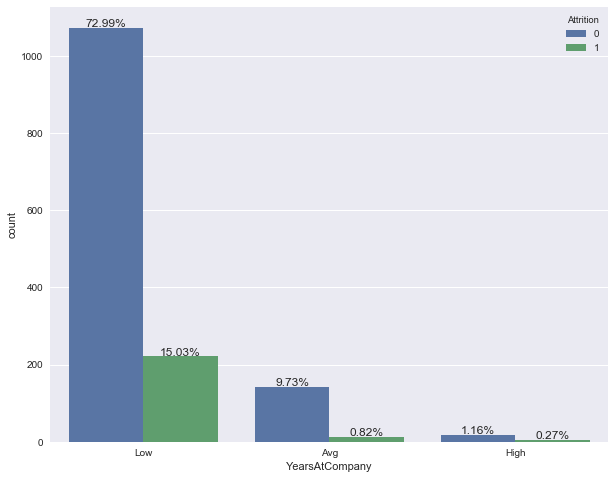

In [18]:
target = pd.cut(df['YearsAtCompany'], bins=3, labels=['Low', 'Avg', 'High'], right=False)

### PLOT
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
total = float(len(df)) 
ax = sns.countplot(x=target, hue="Attrition", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

##### Doing statistical test to check the Significance between target and independent features

In [19]:
### Let's convert continious to discrete
target = pd.cut(df['YearsAtCompany'], bins=4, labels=['0-9', '10-19', '20-29', '30-40'], right=False)
target_value = {'0-9':1, '10-19':2, '20-29':3, '30-40':4}
ind_YAC = target.apply(lambda x: target_value[x])
type(ind_YAC)

pandas.core.series.Series

In [20]:
# contingency table
table = np.array([df['Attrition'], ind_YAC])
stat, p, dof, expected = chi2_contingency(table)
# interpret p-value
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent, Significant (reject H0)')
else:
    print('Independent, Insignificant (fail to reject H0)')

significance=0.050, p=1.000
Independent, Insignificant (fail to reject H0)


##### Now let's look at the categorical features with and without object

In [21]:
df_cat.describe(exclude='int64')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


##### Almost all the statistc are self explanatory but we can have some peculier observation like the Attrition feature which tells us about how imbalance is our target variable.

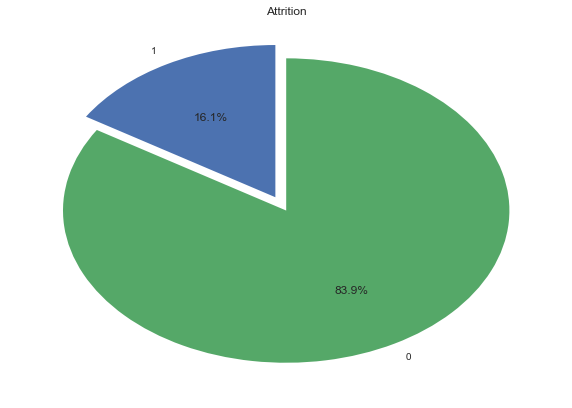

In [22]:
sizes = []
for i in df['Attrition'].unique():
    sizes.append(len(df[df['Attrition']==i])/len(df['Attrition'])*100)
labels = list(df['Attrition'].unique())
fig = plt.figure(figsize=(10,7))
explode = (0.1, 0)
plt.title('Attrition')
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

##### Most of the employee travels rarely while the department with highest number of employees are Research and Development

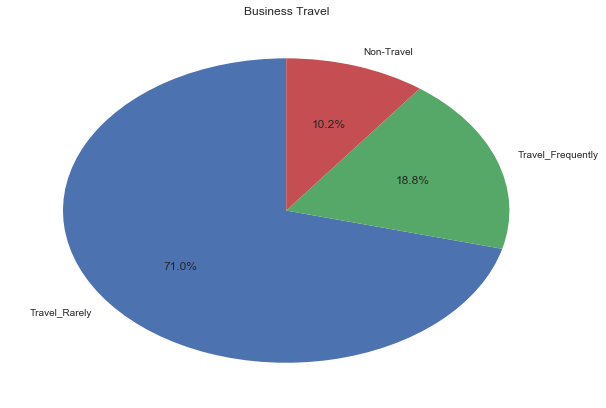

In [23]:
sizes = []
for i in df['BusinessTravel'].unique():
    sizes.append(len(df[df['BusinessTravel']==i])/len(df['BusinessTravel'])*100)
labels = list(df['BusinessTravel'].unique())
fig = plt.figure(figsize=(10,7))
explode = (0, 0, 0)
plt.title('Business Travel')
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

•There are high number of employees who travel rarely, followed by those employee who travel frequently and non - travelers.
•The highest number of Attrition rate is of the employee who travels rarely, while the lowest being the non -traveler one.


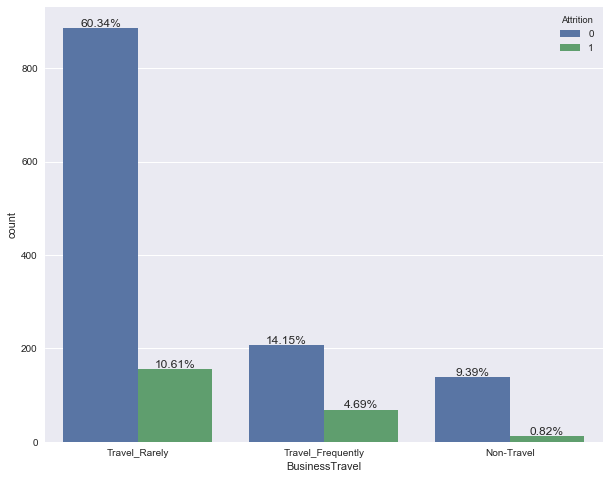

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
total = float(len(df)) 
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

##### Another interesting finding is that the huge number of employee doesn't do Overtime

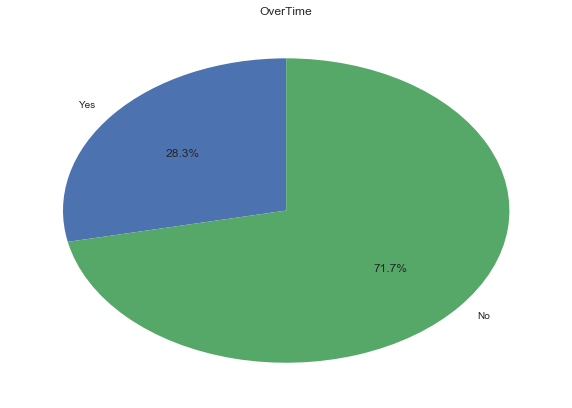

In [25]:
sizes = []
for i in df['OverTime'].unique():
    sizes.append(len(df[df['OverTime']==i])/len(df['OverTime'])*100)
labels = list(df['OverTime'].unique())
fig = plt.figure(figsize=(10,7))
explode = (0, 0)
plt.title('OverTime')
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

•Employee who does Overtime (28.30%) is less than those who do not (71.70%).


•Attrition Rate of Overtime doer (8.64%) is higher than their counterpart (7.48%)


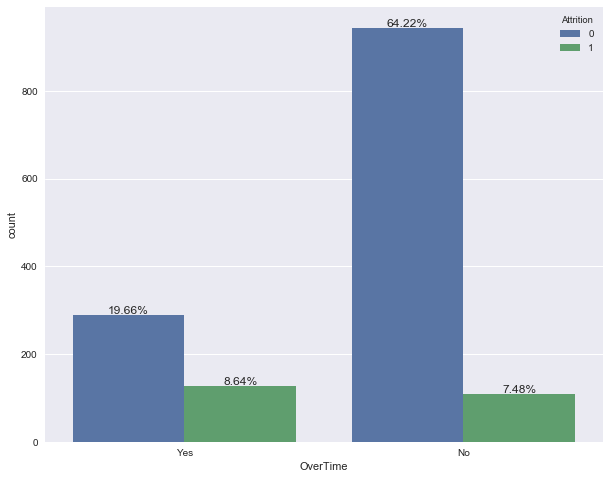

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
total = float(len(df)) 
ax = sns.countplot(x="OverTime", hue="Attrition", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

In [27]:
df_cat.describe(exclude='object')

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.912925,2.721769,2.729932,2.063946,2.728571,3.153741,2.712245,0.793878,2.799320,2.761224
std,1.024165,1.093082,0.711561,1.106940,1.102846,0.360824,1.081209,0.852077,1.289271,0.706476
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000
75%,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,1.000000,3.000000,3.000000
max,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,6.000000,4.000000



##### Here almost all of the features are normally distributed and is ordinal in narture now let's look at attrition vs other features so we can have more clear understanding.

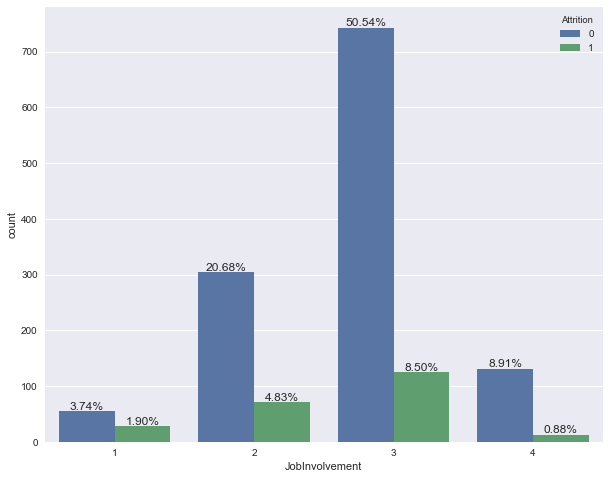

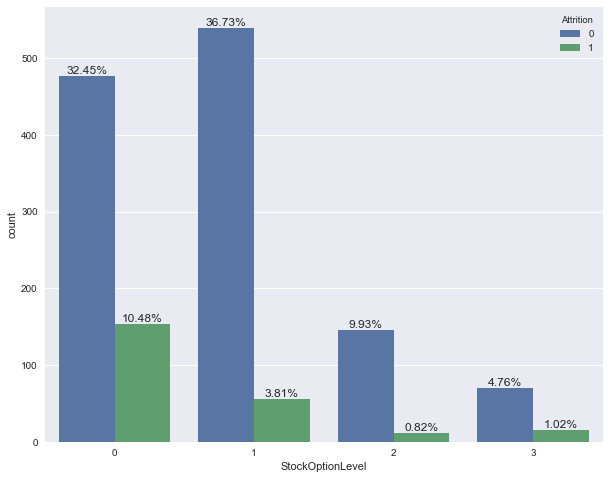

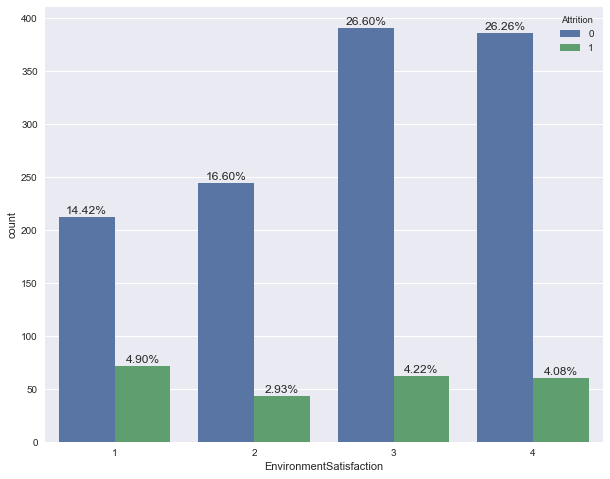

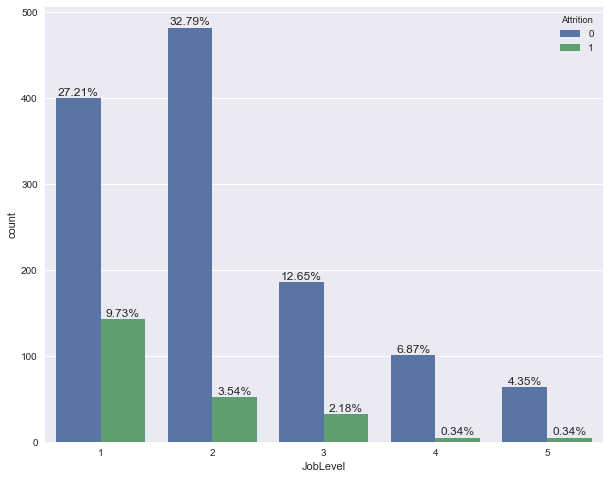

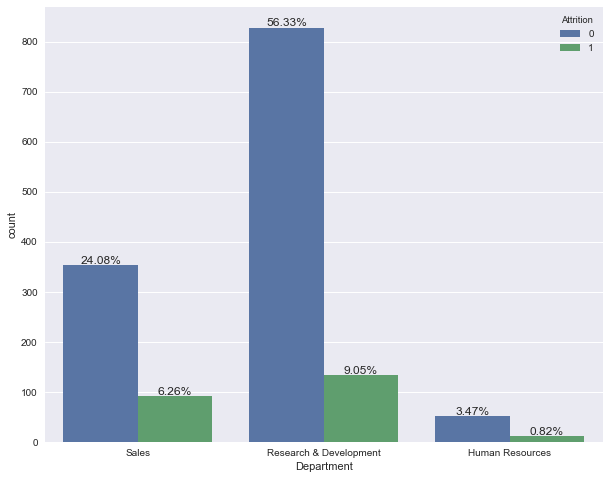

In [28]:
cols = ['JobInvolvement', 'StockOptionLevel', 'EnvironmentSatisfaction', 'JobLevel', 'Department']

for i in cols:
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,8))
    total = float(len(df)) 
    ax = sns.countplot(x=i, hue="Attrition", data=df) # for Seaborn version 0.7 and more
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format((height/total)*100),
                ha="center") 
    plt.show()

##### PAIR PLOT

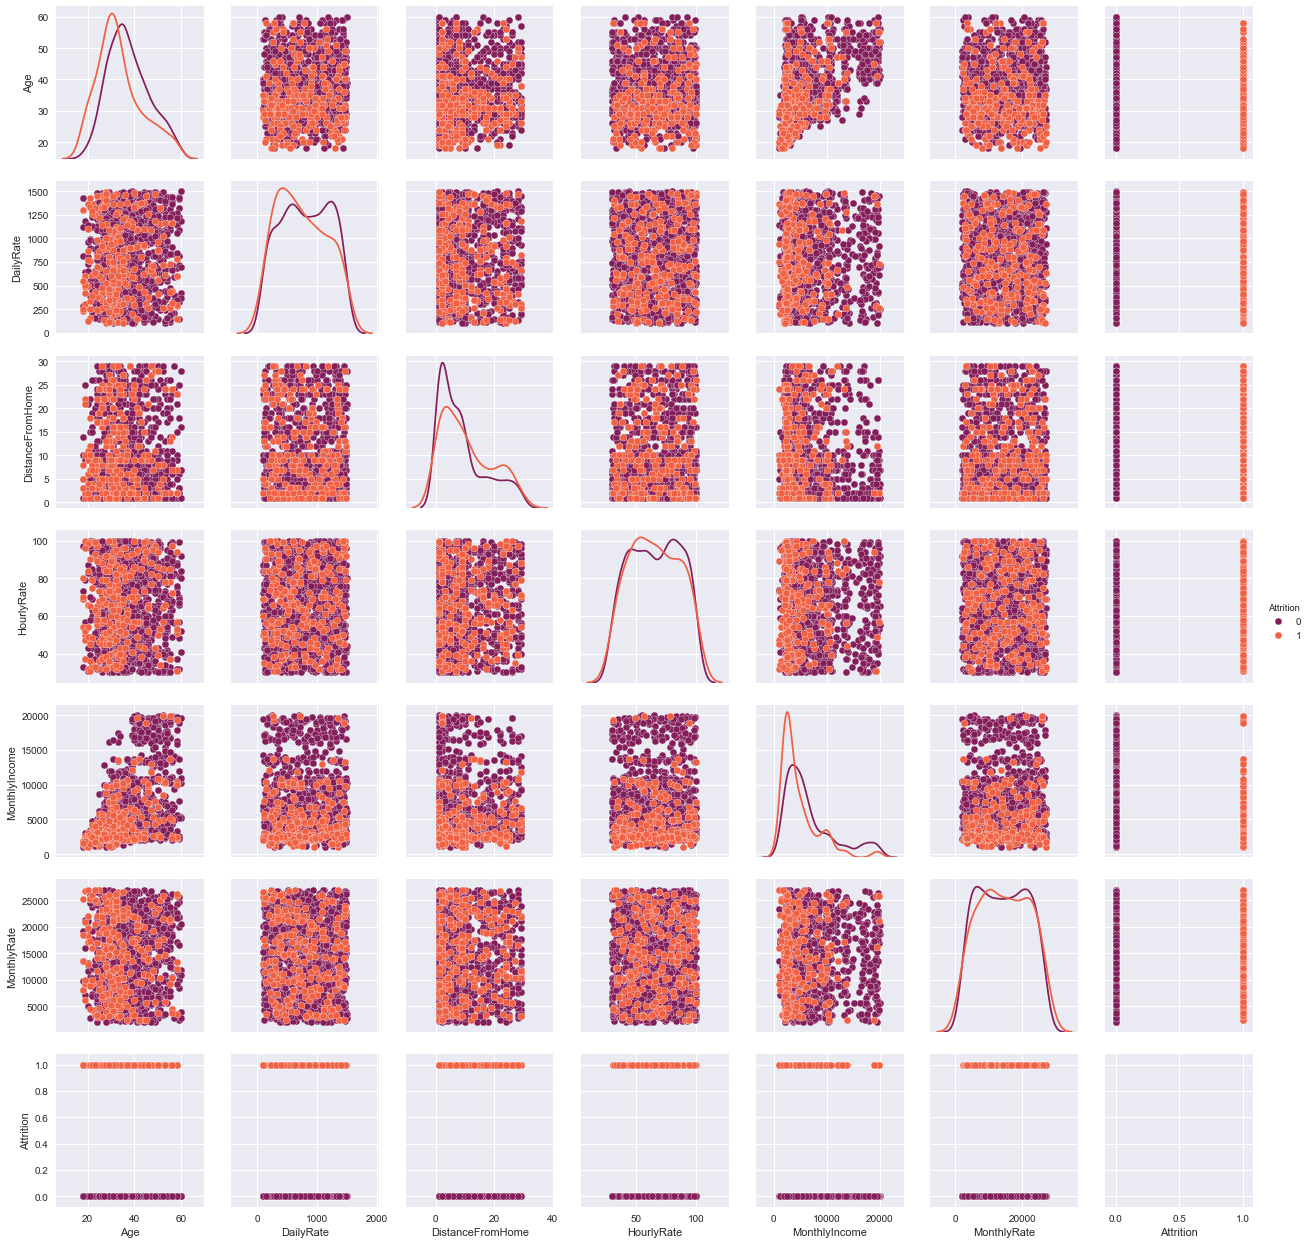

In [29]:
cols_pair = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Attrition']
sns.pairplot(df[cols_pair], diag_kind = "kde", hue='Attrition', palette='rocket')
plt.show()

##### HEATMAP

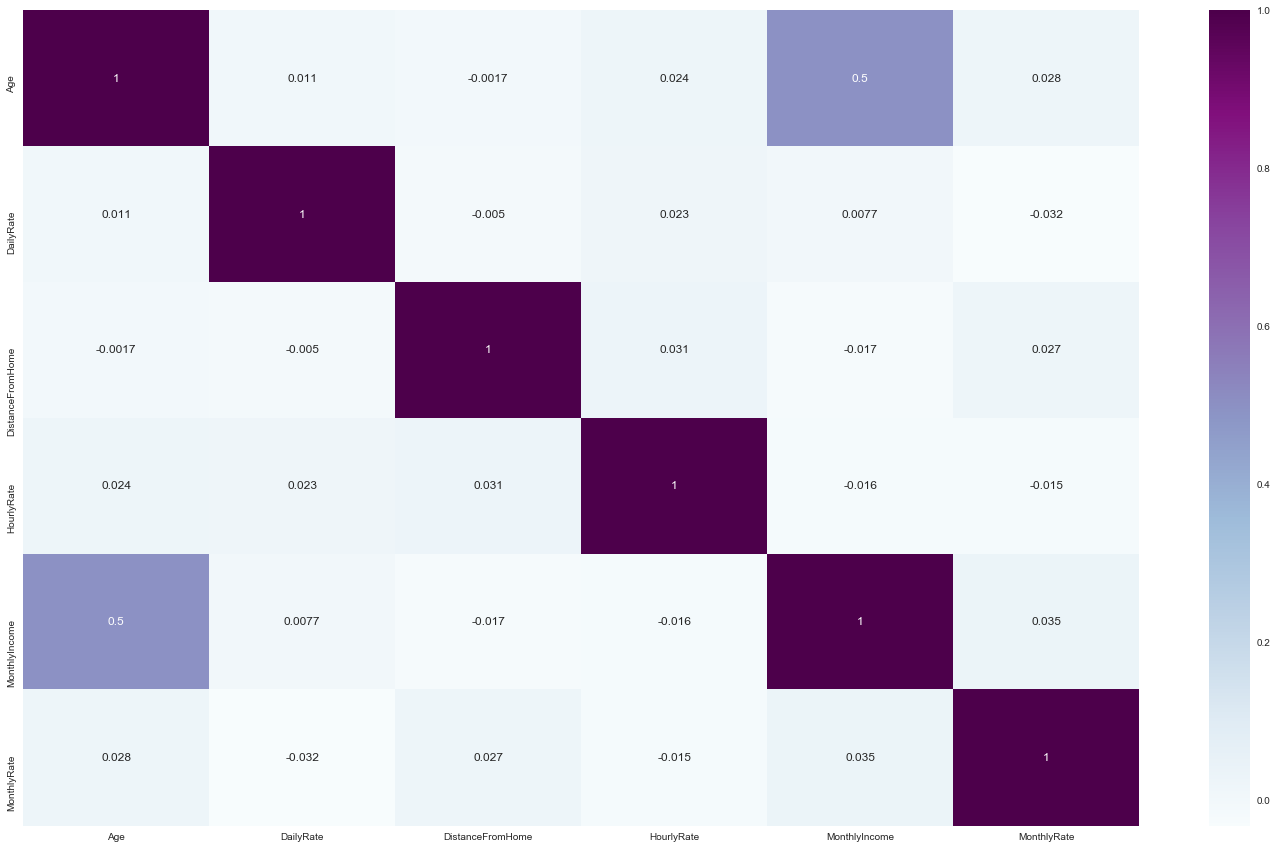

In [30]:
col = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']
plt.figure(figsize=(25,15))
sns.heatmap(df_qua[col].corr(),cmap="BuPu", annot=True)
plt.show()

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally, when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. In the case that we have quite a lot of correlated features one could perhaps apply a technique such as Principal Component Analysis (PCA) to reduce the feature space.

##### OUTLIERS

In [32]:
## Selecting columns with outlier with quantiles method

outliers = []
def search_features_with_outliers(df):
    for i in df.columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        for j in df[i]:
            if j > q3+1.5*(q3-q1):
                outliers.append(i)
                break
            else:
                continue
    pass
    return outliers        
            
search_features_with_outliers(df_qua)

['MonthlyIncome',
 'NumCompaniesWorked',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### encoding categorical columns and dropping unwanted columns

In [29]:
df = pd.get_dummies(df, columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])

In [30]:
df = df.drop(['Over18','StandardHours','EmployeeCount'], axis=1)

In [31]:
df['Attrition'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [32]:
target_map = {'Yes':1, 'No':0}
df['Attrition'] = df['Attrition'].apply(lambda x: target_map[x])

In [33]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


# Model building on original data

In [34]:
df['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [35]:
x = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [38]:
Model = []
Accuracy = []
F1Score = []

##### Logistic Regression

In [39]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred1 = lr.predict(x_train)
print('train accuracy ', accuracy_score(y_train, lr_pred1))
print()
print('f1 score ',f1_score(y_test, lr_pred, average=None))
print()
print('accuracy score ', accuracy_score(y_test, lr_pred))
print()
print('roc auc score ',roc_auc_score(y_test,lr_pred))

train accuracy  0.8979591836734694

f1 score  [0.92529489 0.5210084 ]

accuracy score  0.8707482993197279

roc auc score  0.6861888111888113


In [40]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       364
           1       0.74      0.40      0.52        77

    accuracy                           0.87       441
   macro avg       0.81      0.69      0.72       441
weighted avg       0.86      0.87      0.85       441



In [41]:
Model.append('LR on Imbalanced Data')
F1Score.append(f1_score(y_test, lr_pred, average=None))
Accuracy.append(accuracy_score(y_test, lr_pred))

##### Navie Bayes

In [42]:
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
nb_pred1 = nb.predict(x_train)
print('train score ', accuracy_score(y_train, nb_pred1))
print()
print('f1 score ',f1_score(y_test, nb_pred, average=None))
print()
print('accuracy score ', accuracy_score(y_test, nb_pred))
print()
print('roc auc score ',roc_auc_score(y_test,nb_pred))

train score  0.815354713313897

f1 score  [0.85588235 0.51485149]

accuracy score  0.7777777777777778

roc auc score  0.7373876123876124


In [43]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       364
           1       0.42      0.68      0.51        77

    accuracy                           0.78       441
   macro avg       0.67      0.74      0.69       441
weighted avg       0.83      0.78      0.80       441



In [44]:
Model.append('NB on Imbalanced Data')
F1Score.append(f1_score(y_test, nb_pred, average=None))
Accuracy.append(accuracy_score(y_test, nb_pred))

##### Decision Tree

In [45]:
# with gini

gm = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
gm.fit(x_train, y_train)
gm_pred = gm.predict(x_test)
gm_pred1= gm.predict(x_train)
print('train score ', accuracy_score(y_train, gm_pred1))
print()
print('f1 score ',f1_score(y_test, gm_pred, average=None))
print()
print('accuracy score ', accuracy_score(y_test, gm_pred))
print()
print('roc auc score ',roc_auc_score(y_test, gm_pred))
print()
print(classification_report(y_test, gm_pred))

train score  0.8610301263362488

f1 score  [0.90656566 0.17777778]

accuracy score  0.8321995464852607

roc auc score  0.5450799200799202

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       364
           1       0.62      0.10      0.18        77

    accuracy                           0.83       441
   macro avg       0.73      0.55      0.54       441
weighted avg       0.80      0.83      0.78       441



In [46]:
Model.append('Decision Tree on Imbalanced Data')
F1Score.append(f1_score(y_test, gm_pred, average=None))
Accuracy.append(accuracy_score(y_test, gm_pred))

In [54]:
# with entropy

en = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
en.fit(x_train, y_train)
en_pred = en.predict(x_test)
en_pred1 = en.predict(x_train)
print('train score ', accuracy_score(y_train, en_pred1))
print()
print('f1 score ',f1_score(y_test, en_pred))
print()
print('accuracy score ', accuracy_score(y_test, en_pred))
print()
print('roc auc score ',roc_auc_score(y_test, en_pred))
print()
print(classification_report(y_test, en_pred))

train score  0.8610301263362488

f1 score  0.1777777777777778

accuracy score  0.8321995464852607

roc auc score  0.5450799200799202

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       364
           1       0.62      0.10      0.18        77

    accuracy                           0.83       441
   macro avg       0.73      0.55      0.54       441
weighted avg       0.80      0.83      0.78       441



##### Let's try tuning the model to see if we can further improve the accuracy

In [55]:
classifiers = { "LogisiticRegression": LogisticRegression()}

In [56]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
training_score.mean()
print('ROC_AUC_Accuracy ',training_score.mean())

Classifiers:  LogisticRegression Has a training score of 88.0 % accuracy score
ROC_AUC_Accuracy  0.8756144920672508


###### Hence we can see that after tuning the logistic regression model, we got the accuracy of 88%

##### Random Forest

In [47]:
params = {
    
    'n_estimators':[50,100,150,200],
    'criterion':['gini','entropy'],
    #'splitter':['best','random'],
    'max_depth':[5,10,15],
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

rf = RandomForestClassifier()

gs = GridSearchCV(estimator=rf,param_grid=params,cv=3,scoring='recall',n_jobs=-1)
gs.fit(x,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 8,
 'n_estimators': 100}

In [49]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_rf1 = rf.predict(x_train)

In [50]:
print('training score ',accuracy_score(y_train, y_pred_rf1))
print()
print('f1-score ', f1_score(y_test, y_pred_rf, average=None))
print()
print('accuracy score ',accuracy_score(y_test, y_pred_rf))
print()
print('roc auc score ',roc_auc_score(y_test, y_pred_rf))
print()
print(classification_report(y_test, y_pred_rf))

training score  0.858114674441205

f1-score  [0.90863579 0.12048193]

accuracy score  0.8344671201814059

roc auc score  0.531093906093906

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       364
           1       0.83      0.06      0.12        77

    accuracy                           0.83       441
   macro avg       0.83      0.53      0.51       441
weighted avg       0.83      0.83      0.77       441



In [51]:
Model.append('Random Forest on Imbalanced Data')
F1Score.append(f1_score(y_test, y_pred_rf, average=None))
Accuracy.append(accuracy_score(y_test, y_pred_rf))

##### Gradient Boosting 

In [52]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
gb_pred1 = gb.predict(x_train)

In [55]:
print('training acc',accuracy_score(y_train, gb_pred1))
print()
print(f1_score(y_test, gb_pred, average=None))
print()
print(accuracy_score(y_test, gb_pred))
print()
print(roc_auc_score(y_test, gb_pred))
print()
print(classification_report(y_test, gb_pred))

training acc 1.0

[0.90837696 0.40677966]

0.8412698412698413

0.6324925074925075

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       364
           1       0.59      0.31      0.41        77

    accuracy                           0.84       441
   macro avg       0.73      0.63      0.66       441
weighted avg       0.82      0.84      0.82       441



In [56]:
Model.append('Gradient Boosting on Imbalanced Data')
F1Score.append(f1_score(y_test, gb_pred, average=None))
Accuracy.append(accuracy_score(y_test, gb_pred))

### Applying feature selection

In [57]:
df_new = df.copy()

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(df_new.drop('Attrition',axis=1))
Y=df_new.Attrition.values
X_new = SelectKBest(chi2, k=2).fit_transform(Scaled_X, Y)
x_train_f,x_test_f,y_train_f,y_test_f=train_test_split(X_new,Y,test_size=0.30,random_state=1)

##### Logistic Regression 

In [59]:
lr = LogisticRegression()
lr.fit(x_train_f, y_train_f)
lr_pred = lr.predict(x_test_f)
lr_pred1 = lr.predict(x_train_f)
print('train accuracy ', accuracy_score(y_train_f, lr_pred1))
print()
print('f1 score ',f1_score(y_test_f, lr_pred, average=None))
print()
print('accuracy score ', accuracy_score(y_test_f, lr_pred))
print()
print('roc auc score ',roc_auc_score(y_test_f,lr_pred))

train accuracy  0.8503401360544217

f1 score  [0.90589711 0.11764706]

accuracy score  0.8299319727891157

roc auc score  0.5283466533466533


##### Naive Bayes

In [60]:
nb = GaussianNB()
nb.fit(x_train_f,y_train_f)
nb_pred = nb.predict(x_test_f)
nb_pred1 = nb.predict(x_train_f)
print('train score ', accuracy_score(y_train_f, nb_pred1))
print()
print('f1 score ',f1_score(y_test_f, nb_pred, average=None))
print()
print('accuracy score ', accuracy_score(y_test_f, nb_pred))
print()
print('roc auc score ',roc_auc_score(y_test_f,nb_pred))

train score  0.8338192419825073

f1 score  [0.89317889 0.20952381]

accuracy score  0.8117913832199547

roc auc score  0.548076923076923


##### Decision Tree

In [72]:
gm = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
gm.fit(x_train_f, y_train_f)
gm_pred = gm.predict(x_test_f)
gm_pred1= gm.predict(x_train_f)
print('train score ', accuracy_score(y_train_f, gm_pred1))
print()
print('f1 score ',f1_score(y_test_f, gm_pred, average=None))
print()
print('accuracy score ', accuracy_score(y_test_f, gm_pred))
print()
print('roc auc score ',roc_auc_score(y_test_f, gm_pred))

train score  0.8503401360544217

f1 score  [0.90589711 0.11764706]

accuracy score  0.8299319727891157

roc auc score  0.5283466533466533


##### Random Forest

In [73]:
params = {
    
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    #'splitter':['best','random'],
    'max_depth':range(2,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

rf = RandomForestClassifier()

gs = GridSearchCV(estimator=rf,param_grid=params,cv=3,scoring='recall',n_jobs=-1)
gs.fit(X_new,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [74]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 4,
 'n_estimators': 10}

In [75]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(x_train_f,y_train_f)
y_pred_rf = rf.predict(x_test_f)
y_pred_rf1 = rf.predict(x_train_f)

In [77]:
print('training score ',accuracy_score(y_train_f, y_pred_rf1))
print()
print('f1-score ', f1_score(y_test_f, y_pred_rf, average=None))
print()
print('accuracy score ',accuracy_score(y_test_f, y_pred_rf))
print()
print('roc auc score ',roc_auc_score(y_test_f, y_pred_rf))
print()
print(classification_report(y_test_f, y_pred_rf))

training score  0.8503401360544217

f1-score  [0.90589711 0.11764706]

accuracy score  0.8299319727891157

roc auc score  0.5283466533466533

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       364
           1       0.62      0.06      0.12        77

    accuracy                           0.83       441
   macro avg       0.73      0.53      0.51       441
weighted avg       0.80      0.83      0.77       441



# Backward Elimination

In [61]:
import statsmodels.api as sm

cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male', 'JobRole_Laboratory Technician', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']


In [62]:
x_new = df[selected_features_BE]
x_new.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Sales,EducationField_Human Resources,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Laboratory Technician,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,3,4,8,1,8,0,1,4,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
1,49,8,3,2,2,1,4,10,3,3,7,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,2,4,2,3,6,2,7,3,3,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1
3,33,3,4,3,3,1,3,8,3,3,7,3,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,27,2,1,3,2,9,4,6,3,3,2,2,0,1,0,0,0,0,1,1,0,0,1,0,1,0


In [63]:
y_new = df['Attrition']

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new,y_new,test_size=0.3,random_state=1)

###### Logistic Regression

In [65]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)
lr_pred1 = lr.predict(xtrain)
print('train accuracy ', accuracy_score(ytrain, lr_pred1))
print()
print('f1 score ',f1_score(ytest, lr_pred, average=None))
print()
print('accuracy score ', accuracy_score(ytest, lr_pred))
print()
print('roc auc score ',roc_auc_score(ytest,lr_pred))
print()
print(classification_report(ytest,lr_pred))

train accuracy  0.8901846452866861

f1 score  [0.93264249 0.52727273]

accuracy score  0.8820861678004536

roc auc score  0.682817182817183

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       364
           1       0.88      0.38      0.53        77

    accuracy                           0.88       441
   macro avg       0.88      0.68      0.73       441
weighted avg       0.88      0.88      0.86       441



In [66]:
Model.append('LR on Imbalanced Data after feature selection')
F1Score.append(f1_score(ytest, lr_pred, average=None))
Accuracy.append(accuracy_score(ytest, lr_pred))

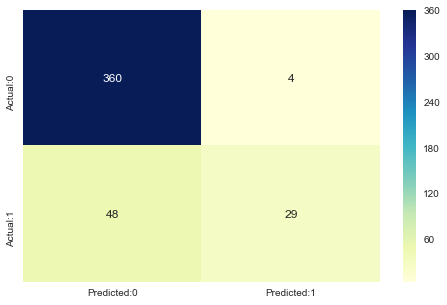

In [83]:
cm=confusion_matrix(ytest,lr_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

###### Navie Bayes

In [67]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
nb_pred = nb.predict(xtest)
nb_pred1 = nb.predict(xtrain)
print('train score ', accuracy_score(ytrain, nb_pred1))
print()
print('f1 score ',f1_score(ytest, nb_pred, average=None))
print()
print('accuracy score ', accuracy_score(ytest, nb_pred))
print()
print('roc auc score ',roc_auc_score(ytest,nb_pred))
print()
print(classification_report(ytest,nb_pred))

train score  0.8620019436345967

f1 score  [0.89315068 0.48684211]

accuracy score  0.8231292517006803

roc auc score  0.6880619380619382

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       364
           1       0.49      0.48      0.49        77

    accuracy                           0.82       441
   macro avg       0.69      0.69      0.69       441
weighted avg       0.82      0.82      0.82       441



In [68]:
Model.append('NB on Imbalanced Data after feature selection')
F1Score.append(f1_score(ytest, nb_pred, average=None))
Accuracy.append(accuracy_score(ytest, nb_pred))

###### Decision Tree 

In [69]:
gm = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
gm.fit(xtrain, ytrain)
gm_pred = gm.predict(xtest)
gm_pred1= gm.predict(xtrain)
print('train score ', accuracy_score(ytrain, gm_pred1))
print()
print('f1 score ',f1_score(ytest, gm_pred, average=None))
print()
print('accuracy score ', accuracy_score(ytest, gm_pred))
print()
print('roc auc score ',roc_auc_score(ytest, gm_pred))
print()
print(classification_report(ytest, gm_pred))

train score  0.8600583090379009

f1 score  [0.90680101 0.15909091]

accuracy score  0.8321995464852607

roc auc score  0.5399600399600399

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       364
           1       0.64      0.09      0.16        77

    accuracy                           0.83       441
   macro avg       0.74      0.54      0.53       441
weighted avg       0.80      0.83      0.78       441



In [70]:
Model.append('Decision Tree on Imbalanced Data after feature selection')
F1Score.append(f1_score(ytest, gm_pred, average=None))
Accuracy.append(accuracy_score(ytest, gm_pred))

##### Random Forest

In [71]:
params = {
    
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    #'splitter':['best','random'],
    'max_depth':range(2,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

rf = RandomForestClassifier()

gs = GridSearchCV(estimator=rf,param_grid=params,cv=3,scoring='recall',n_jobs=-1)
gs.fit(x_new,y_new)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [72]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': 9,
 'n_estimators': 20}

In [73]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(xtrain,ytrain)
y_pred_rf = rf.predict(xtest)
y_pred_rf1 = rf.predict(xtrain)

In [74]:
print('training score ',accuracy_score(ytrain, y_pred_rf1))
print()
print('f1-score ', f1_score(ytest, y_pred_rf, average=None))
print()
print('accuracy score ',accuracy_score(ytest, y_pred_rf))
print()
print('roc auc score ',roc_auc_score(ytest, y_pred_rf))
print()
print(classification_report(ytest, y_pred_rf))

training score  0.858114674441205

f1-score  [0.9075     0.09756098]

accuracy score  0.8321995464852607

roc auc score  0.5246003996003996

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       364
           1       0.80      0.05      0.10        77

    accuracy                           0.83       441
   macro avg       0.82      0.52      0.50       441
weighted avg       0.83      0.83      0.77       441



In [75]:
Model.append('Random Forest on Imbalanced Data after feature selection')
F1Score.append(f1_score(ytest, y_pred_rf, average=None))
Accuracy.append(accuracy_score(ytest, y_pred_rf))

# Backward Elimination

In [76]:
import statsmodels.api as sm

cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male', 'JobRole_Laboratory Technician', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']


In [91]:
x_new = df[selected_features_BE]
x_new.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Sales,EducationField_Human Resources,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Laboratory Technician,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,3,4,8,1,8,0,1,4,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
1,49,8,3,2,2,1,4,10,3,3,7,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,2,4,2,3,6,2,7,3,3,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1
3,33,3,4,3,3,1,3,8,3,3,7,3,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,27,2,1,3,2,9,4,6,3,3,2,2,0,1,0,0,0,0,1,1,0,0,1,0,1,0


In [92]:
y_new = df['Attrition']

In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new,y_new,test_size=0.3,random_state=1)

##### Logistic Regression 

In [94]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)
lr_pred1 = lr.predict(xtrain)
print('train accuracy ', accuracy_score(ytrain, lr_pred1))
print()
print('f1 score ',f1_score(ytest, lr_pred, average=None))
print()
print('accuracy score ', accuracy_score(ytest, lr_pred))
print()
print('roc auc score ',roc_auc_score(ytest,lr_pred))
print()
print(classification_report(ytest,lr_pred))

train accuracy  0.8901846452866861

f1 score  [0.93264249 0.52727273]

accuracy score  0.8820861678004536

roc auc score  0.682817182817183

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       364
           1       0.88      0.38      0.53        77

    accuracy                           0.88       441
   macro avg       0.88      0.68      0.73       441
weighted avg       0.88      0.88      0.86       441



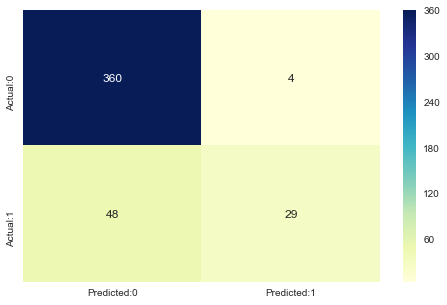

In [95]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,lr_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

###### Navie Bayes

In [96]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
nb_pred = nb.predict(xtest)
nb_pred1 = nb.predict(xtrain)
print('train score ', accuracy_score(ytrain, nb_pred1))
print()
print('f1 score ',f1_score(ytest, nb_pred, average=None))
print()
print('accuracy score ', accuracy_score(ytest, nb_pred))
print()
print('roc auc score ',roc_auc_score(ytest,nb_pred))
print()
print(classification_report(ytest,nb_pred))

train score  0.8620019436345967

f1 score  [0.89315068 0.48684211]

accuracy score  0.8231292517006803

roc auc score  0.6880619380619382

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       364
           1       0.49      0.48      0.49        77

    accuracy                           0.82       441
   macro avg       0.69      0.69      0.69       441
weighted avg       0.82      0.82      0.82       441



###### Decision Tree 

In [97]:
gm = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
gm.fit(xtrain, ytrain)
gm_pred = gm.predict(xtest)
gm_pred1= gm.predict(xtrain)
print('train score ', accuracy_score(ytrain, gm_pred1))
print()
print('f1 score ',f1_score(ytest, gm_pred, average=None))
print()
print('accuracy score ', accuracy_score(ytest, gm_pred))
print()
print('roc auc score ',roc_auc_score(ytest, gm_pred))
print()
print(classification_report(ytest, gm_pred))

train score  0.8600583090379009

f1 score  [0.90680101 0.15909091]

accuracy score  0.8321995464852607

roc auc score  0.5399600399600399

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       364
           1       0.64      0.09      0.16        77

    accuracy                           0.83       441
   macro avg       0.74      0.54      0.53       441
weighted avg       0.80      0.83      0.78       441



##### Random Forest

In [98]:
params = {
    
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    #'splitter':['best','random'],
    'max_depth':range(2,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

rf = RandomForestClassifier()

gs = GridSearchCV(estimator=rf,param_grid=params,cv=3,scoring='recall',n_jobs=-1)
gs.fit(x_new,y_new)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [99]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 8,
 'n_estimators': 10}

In [100]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(xtrain,ytrain)
y_pred_rf = rf.predict(xtest)
y_pred_rf1 = rf.predict(xtrain)

In [101]:
print('training score ',accuracy_score(ytrain, y_pred_rf1))
print()
print('f1-score ', f1_score(ytest, y_pred_rf, average=None))
print()
print('accuracy score ',accuracy_score(ytest, y_pred_rf))
print()
print('roc auc score ',roc_auc_score(ytest, y_pred_rf))
print()
print(classification_report(ytest, y_pred_rf))

training score  0.8571428571428571

f1-score  [0.90636704 0.07407407]

accuracy score  0.8299319727891157

roc auc score  0.5181068931068931

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       364
           1       0.75      0.04      0.07        77

    accuracy                           0.83       441
   macro avg       0.79      0.52      0.49       441
weighted avg       0.82      0.83      0.76       441



# Balanced Data 

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop(['Attrition'], axis=1))
X=scaled_df
Y=df['Attrition']
SMOTE().fit_resample(X, Y)
X,Y = SMOTE().fit_resample(X, Y)
#split data
train, test, target_train, target_val = train_test_split(X, 
                                                         Y, 
                                                         train_size= 0.80,
                                                         random_state=0);

##### Logistic Regression

In [79]:
LR_b = LogisticRegression(multi_class='auto')
LR_b.fit(train,target_train)
lr_pred_b = LR_b.predict(test)
lr_pred_b1 = LR_b.predict(train)

In [80]:
print('train score ', accuracy_score(target_train, lr_pred_b1))
print()
print('f1 score ',f1_score(target_val, lr_pred_b, average=None))
print()
print('accuracy score ', accuracy_score(target_val, lr_pred_b))
print()
print('roc auc score ', roc_auc_score(target_val, lr_pred_b))
print()
print(classification_report(target_val, lr_pred_b))

train score  0.8047667342799188

f1 score  [0.77586207 0.80152672]

accuracy score  0.7894736842105263

roc auc score  0.7888499333366253

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       231
           1       0.80      0.80      0.80       263

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.79      0.79      0.79       494



In [81]:
Model.append('LR on Balanced Data')
F1Score.append(f1_score(target_val, lr_pred_b, average=None))
Accuracy.append(accuracy_score(target_val, lr_pred_b))

##### Navie Bayes

In [82]:
nb_b = GaussianNB()
nb_b.fit(train,target_train)
nb_pred_b = nb_b.predict(test)
nb_pred_b1 = nb_b.predict(train)

print('training score ', accuracy_score(target_train, nb_pred_b1))
print()
print('f1 score ',f1_score(target_val, nb_pred_b, average=None))
print()
print('accuracy score ', accuracy_score(target_val, nb_pred_b))
print()
print('roc auc score ',roc_auc_score(target_val,nb_pred_b))
print()
print(classification_report(target_val, nb_pred_b))

training score  0.6866125760649088

f1 score  [0.647343  0.7456446]

accuracy score  0.7044534412955465

roc auc score  0.6968873965071684

              precision    recall  f1-score   support

           0       0.73      0.58      0.65       231
           1       0.69      0.81      0.75       263

    accuracy                           0.70       494
   macro avg       0.71      0.70      0.70       494
weighted avg       0.71      0.70      0.70       494



In [83]:
Model.append('NB on Balanced Data')
F1Score.append(f1_score(target_val, nb_pred_b, average=None))
Accuracy.append(accuracy_score(target_val, nb_pred_b))

##### Decision Tree

In [84]:
gm_b = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
gm_b.fit(train, target_train)
gm_pred_b = gm_b.predict(test)
gm_pred_b1 = gm_b.predict(train)

print('train score ', accuracy_score(target_train, gm_pred_b1))
print()
print('f1 score ',f1_score(target_val, gm_pred_b, average=None))
print()
print('accuracy score ', accuracy_score(target_val, gm_pred_b))
print()
print('roc auc score ',roc_auc_score(target_val, gm_pred_b))
print()
print(classification_report(target_val, gm_pred_b))

train score  0.7910750507099391

f1 score  [0.73839662 0.75875486]

accuracy score  0.7489878542510121

roc auc score  0.7495103122479548

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       231
           1       0.78      0.74      0.76       263

    accuracy                           0.75       494
   macro avg       0.75      0.75      0.75       494
weighted avg       0.75      0.75      0.75       494



In [85]:
Model.append('Decision Tree on Balanced Data')
F1Score.append(f1_score(target_val, gm_pred_b, average=None))
Accuracy.append(accuracy_score(target_val, gm_pred_b))

##### Random Forest

In [86]:
seed = 0
params = {
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2'],
    'verbose':[0]
}
rf = RandomForestClassifier()
rs = RandomizedSearchCV(rf, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
rs.fit(X,Y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [87]:
rs.best_params_

{'verbose': 0,
 'n_estimators': 60,
 'max_leaf_nodes': 9,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'gini'}

In [88]:
rf = RandomForestClassifier(**rs.best_params_)
rf.fit(train, target_train)
rf_pred = rf.predict(test)
rf_pred1 = rf.predict(train)

In [89]:
print('train score ',accuracy_score(target_train, rf_pred1))
print()
print('f1 score ', f1_score(target_val, rf_pred, average=None))
print()
print('accuracy score ',accuracy_score(target_val, rf_pred))
print()
print('roc auc score ',roc_auc_score(target_val, rf_pred))
print()
print(classification_report(target_val, rf_pred))

train score  0.8676470588235294

f1 score  [0.83333333 0.83467742]

accuracy score  0.8340080971659919

roc auc score  0.8372590653959475

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       231
           1       0.89      0.79      0.83       263

    accuracy                           0.83       494
   macro avg       0.84      0.84      0.83       494
weighted avg       0.84      0.83      0.83       494



In [90]:
Model.append('Random Forest on Balanced Data')
F1Score.append(f1_score(target_val, rf_pred, average=None))
Accuracy.append(accuracy_score(target_val, rf_pred))

##### Gradient Boosting 

In [91]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [92]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(train, target_train)
gb_pred = gb.predict(test)
gb_pred1 = gb.predict(train)

In [93]:
print('train score ',accuracy_score(target_train, gb_pred1))
print()
print('f1 score ', f1_score(target_val, gb_pred, average=None))
print()
print('accuracy score ',accuracy_score(target_val, gb_pred))
print()
print('roc auc score ',roc_auc_score(target_val, gb_pred))
print()
print(classification_report(target_val, gb_pred))

train score  1.0

f1 score  [0.92371134 0.92644135]

accuracy score  0.9251012145748988

roc auc score  0.9278142643161655

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       231
           1       0.97      0.89      0.93       263

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



In [94]:
Model.append('Gradient Boosting on Balanced Data')
F1Score.append(f1_score(target_val, gb_pred, average=None))
Accuracy.append(accuracy_score(target_val, gb_pred))

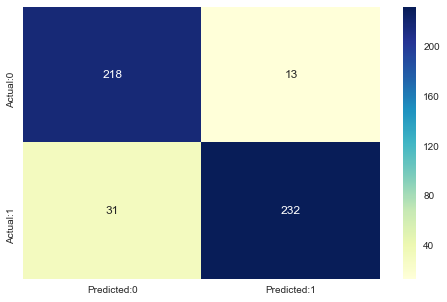

In [115]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(target_val, gb_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [116]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9109311740890689 

 The Miss-classification = 1-Accuracy =  0.08906882591093113 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8821292775665399 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9437229437229437 

 Positive Predictive value = TP / (TP+FP) =  0.9469387755102041 

 Negative predictive Value = TN / (TN+FN) =  0.8755020080321285 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  15.674758701374676 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.12489971046848293


##### After applying ensemble techniques on balanced dataset, Gradient boosting was giving the highest accuracy of 91%

# Feature Selection on Balanced Dataset

In [117]:
X = df.drop(['Attrition'], axis=1)
Y = df[['Attrition']]

In [118]:
# using select k best

In [119]:
SMOTE().fit_resample(X, Y)
X1,Y1 = SMOTE().fit_resample(X, Y)

In [120]:
min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X1)
Y_new=Y1
X_new = SelectKBest(chi2, k=2).fit_transform(Scaled_X, Y_new)

In [121]:
x_train_f1,x_test_f1,y_train_f1,y_test_f1=train_test_split(X_new,Y_new,test_size=0.30,random_state=1)

In [122]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [123]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(x_train_f1, y_train_f1)
gb_pred = gb.predict(x_test_f1)
gb_pred1 = gb.predict(x_train_f1)

In [124]:
print('train score ',accuracy_score(y_train_f1, gb_pred1))
print()
print('f1 score ', f1_score(y_test_f1, gb_pred, average=None))
print()
print('accuracy score ',accuracy_score(y_test_f1, gb_pred))
print()
print('roc auc score ',roc_auc_score(y_test_f1, gb_pred))
print()
print(classification_report(y_test_f1, gb_pred))

train score  0.7584009269988412

f1 score  [0.72830725 0.75418275]

accuracy score  0.7418918918918919

roc auc score  0.7417696076993046

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       346
           1       0.77      0.74      0.75       394

    accuracy                           0.74       740
   macro avg       0.74      0.74      0.74       740
weighted avg       0.74      0.74      0.74       740



In [95]:
final_result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy, 'F1Score':F1Score})
final_result

,Model,Accuracy,F1Score
0,LR on Imbalanced Data,0.870748,"[0.9252948885976409, 0.5210084033613446]"
1,NB on Imbalanced Data,0.777778,"[0.8558823529411765, 0.5148514851485149]"
2,Decision Tree on Imbalanced Data,0.832200,"[0.9065656565656566, 0.1777777777777778]"
3,Random Forest on Imbalanced Data,0.834467,"[0.9086357947434291, 0.12048192771084336]"
4,Gradient Boosting on Imbalanced Data,0.841270,"[0.9083769633507853, 0.4067796610169491]"
5,LR on Imbalanced Data after feature selection,0.882086,"[0.9326424870466321, 0.5272727272727273]"
6,NB on Imbalanced Data after feature selection,0.823129,"[0.893150684931507, 0.48684210526315785]"
7,Decision Tree on Imbalanced Data after feature...,0.832200,"[0.906801007556675, 0.1590909090909091]"
8,Random Forest on Imbalanced Data after feature...,0.832200,"[0.9075, 0.0975609756097561]"
9,LR on Balanced Data,0.789474,"[0.7758620689655173, 0.801526717557252]"
